In [2]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
x = df.drop(columns=['HeartDisease'])
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [5]:
y = df.HeartDisease

In [6]:
x.select_dtypes(include=['object']).describe()


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
x.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Convert Strings to Float 

In [7]:
# sex column : 0  Female & 1 Male
x['Sex'] = x['Sex'].replace(['M','F'],[1,0])
x['ChestPainType'] = x['ChestPainType'].replace(['ATA','NAP','ASY','TA'],[0,1,2,3])
x['RestingECG'] = x['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2])
x['ExerciseAngina'] = x['ExerciseAngina'].replace(['N','Y'],[0,1])
x['ST_Slope'] = x['ST_Slope'].replace(['Down','Flat','Up'],[0,1,2])


In [8]:
x.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [9]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,0,140,289,0,0,172,0,0.0,2
1,49,0,1,160,180,0,0,156,0,1.0,1
2,37,1,0,130,283,0,1,98,0,0.0,2
3,48,0,2,138,214,0,0,108,1,1.5,1
4,54,1,1,150,195,0,0,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,0,1.2,1
914,68,1,2,144,193,1,0,141,0,3.4,1
915,57,1,2,130,131,0,0,115,1,1.2,1
916,57,0,0,130,236,0,2,174,0,0.0,1


In [10]:
# KNN Algorithm

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
len(X_train) , len(X_test)


(642, 276)

In [11]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

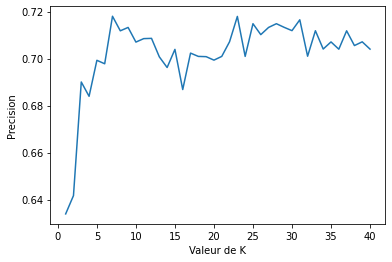

In [34]:
%matplotlib inline
from sklearn.model_selection import cross_val_score
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn =  neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=15,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Valeur de K')
plt.ylabel('Precision')
plt.show()

In [52]:
k_range = list(range(1, 41))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [53]:
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [54]:
grid_search.best_score_

0.7242548076923077

In [55]:
grid_search.best_params_

{'n_neighbors': 8}

<AxesSubplot:>

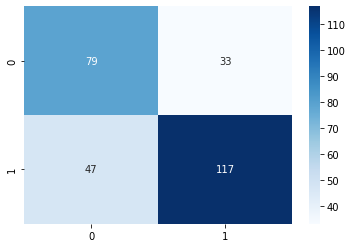

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cf_matrix = confusion_matrix(y_test,y_pre)
sns.heatmap(cf_matrix, annot=True,fmt='', cmap='Blues')

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus


In [22]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth= 3)
dtree.fit(X_train,y_train)
y_tree_predict = dtree.predict(X_test)
accuracy_score(y_test,y_tree_predict)

0.822463768115942

In [17]:
from sklearn.model_selection import GridSearchCV
parm_dist = {'criterion' : ['gini','entropy'],
    'max_depth':[1,2,3,4,5,7,None]}
grid = GridSearchCV(dtree,param_grid=parm_dist,cv=10,n_jobs=-1)

In [18]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 7, None]})

In [19]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
grid.best_score_

0.822451923076923

In [21]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

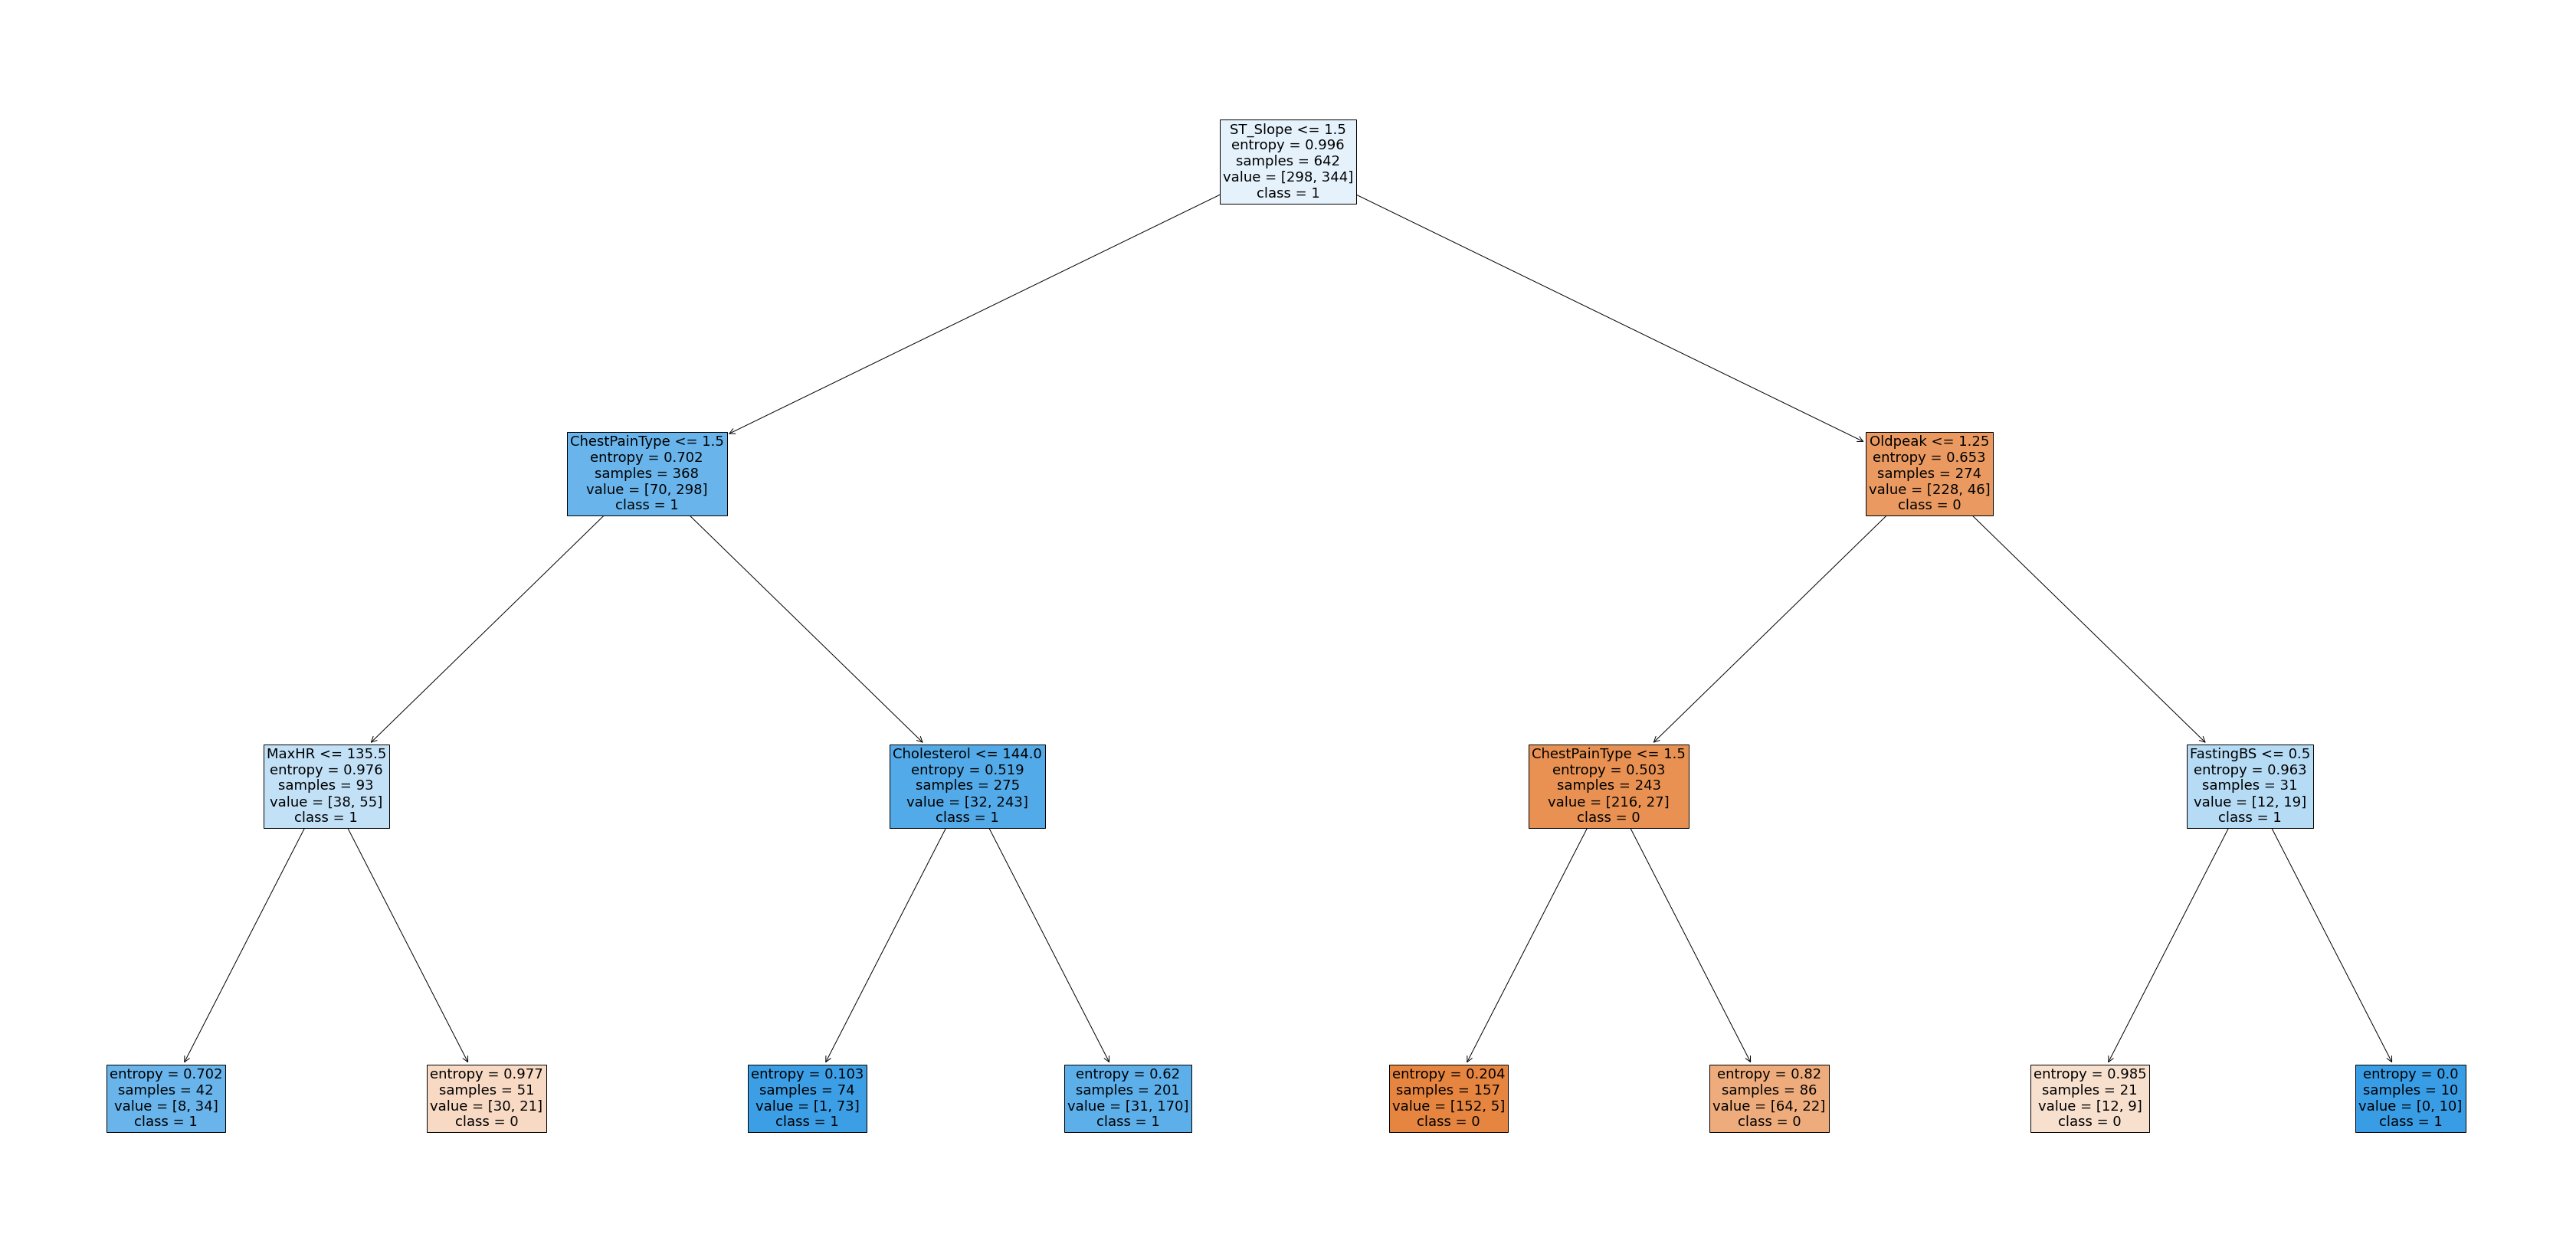

In [24]:
fig = plt.figure(figsize=(60,30))
sklearn.tree.plot_tree(dtree,class_names=['0','1'],feature_names=x.columns,
                   filled=True,fontsize=18)
fig.savefig("decistion_tree.png")
